In [1]:
from __future__ import print_function

%reload_ext autoreload
%autoreload 2
%matplotlib inline
from fastai.basics import *
from fastai.tabular import * 

import time
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [2]:
path = Config().data_path()/'mnist'

In [3]:
with gzip.open(path/'mnist.pkl.gz', 'rb') as f:
    ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding='latin-1')

In [4]:
x_train_as_int = (x_train * 256).astype(int)
x_valid_as_int = (x_valid * 256).astype(int)

In [5]:
type(x_train_as_int[0][0])


numpy.int64

In [6]:
df_train = pd.DataFrame(x_train_as_int) # 50000
df_train['y'] = y_train
df_valid = pd.DataFrame(x_valid_as_int) # 10000
df_valid['y'] = y_valid

In [7]:
df = df_train.append(df_valid).reset_index().drop('index', 1)

In [8]:
df

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,y
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
59996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
59997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
59998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6


In [9]:
len(df_train[100].unique())

256

In [10]:
valid_idx = range(50000, 60000)
procs = [Categorify, Normalize]
cat_names = np.arange(0, 784)
cont_names = []
dep_var = 'y'

In [11]:
tl = TabularList.from_df(df,
                         cat_names=cat_names,
                         cont_names=cont_names,
                         procs=procs)

In [12]:
data = tl.split_by_idx(valid_idx)\
          .label_from_df(cols=dep_var)\
          .databunch()
       

In [13]:
(cat_x,cont_x),y = next(iter(data.train_dl))
for o in (cat_x, cont_x, y): print(to_np(o[:5]))

[[1 1 1 1 ... 1 1 1 1]
 [1 1 1 1 ... 1 1 1 1]
 [1 1 1 1 ... 1 1 1 1]
 [1 1 1 1 ... 1 1 1 1]
 [1 1 1 1 ... 1 1 1 1]]
[0 0 0 0 0]
[5 0 3 7 1]


In [14]:
learn = tabular_learner(data, layers=[200,100], metrics=accuracy)

In [15]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


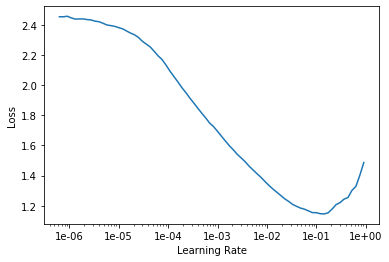

In [16]:
learn.recorder.plot()

In [17]:
lr = 1e-2

In [18]:
learn.fit_one_cycle(3, lr)

epoch,train_loss,valid_loss,accuracy,time
0,0.277285,0.664951,0.830100,01:57
1,0.136419,0.287194,0.954900,01:59
2,0.024780,0.122096,0.963700,01:58


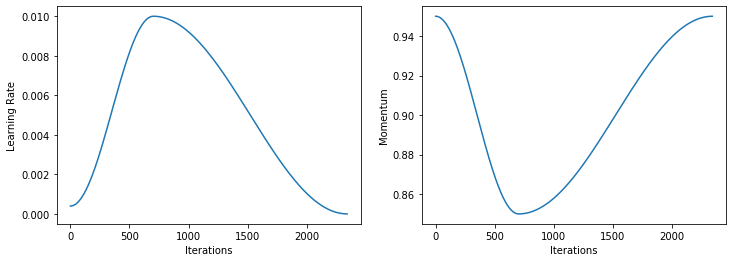

In [19]:
learn.recorder.plot_lr(show_moms=True)

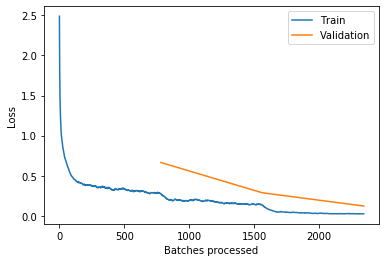

In [20]:
learn.recorder.plot_losses()